In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# 修改默认字体
font = {'family': 'serif',
        'serif': 'Times New Roman',
        'weight': 'normal'}
plt.rc('font', **font)
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [2]:
# 定义全局变量
miu = 0.01 
g = 9.8
m = 75
r = 0.66   # 车轮半径
c = 0.25   # 一个未知系数
w_shoulder = 0.46    # 肩宽
l_leg = 1.0        # 腿长
s = w_shoulder * l_leg   # 人加车正对面积
p = 1.205   # kg/m^3

sigma1 = 32.5 # 表示有氧呼吸的速率  # sigma2表示无氧呼吸的速率，以函数形式给出
T = 10 # 一个时间

In [3]:
# 阻力函数
f1 = miu*m*g/(2*r)

def f2(v):
    return 1/2*c*p*s*(v)**2

def f(v):
    return f1 + f2(v)

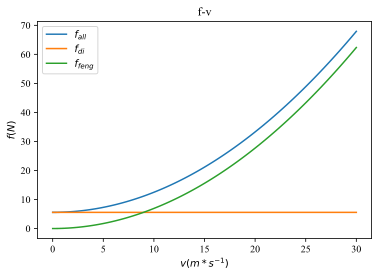

In [4]:
# 阻力-速度图
x = np.linspace(0,30,100)
y1=f1
y2=f2(x)
y = y1 + y2


plt.figure(1)
plt.plot(x,y,label='$f_{all}$')
plt.plot([0, 30],[y1, y1],label='$f_{di}$')
plt.plot(x,y2,label='$f_{feng}$')
plt.title("f-v")
plt.xlabel("$v(m*s^{-1})$")
plt.ylabel("$f(N)$")
plt.legend()
plt.show()



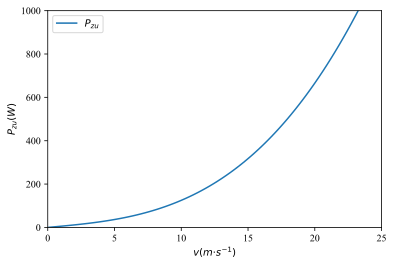

In [5]:
# 功率-速度图
# 测试输出
# print("测试输出速度为20：",20*(f2(20)+y1))

plt.figure(2)
P_zu = y * x
plt.plot(x,P_zu,label='$P_{zu}$')
plt.xlabel("$v(m · s^{-1})$")
plt.ylabel("$P_{zu}(W)$")
plt.ylim([0,1000])
plt.xlim([0,25])
plt.legend()
plt.show()


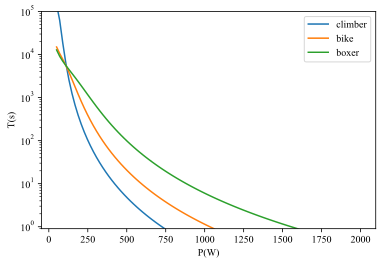

248.54562235987257
50 12818.666676210698
100 6191.046175704268
150 3594.731421512733
200 2070.6098744761184
250 1165.3949220965644
300 660.8780796981864
350 386.8466153629615
400 235.96843296094454
450 150.0785233032025
500 99.2086329308014
550 67.87150803210079
600 47.85043852057877
650 34.63244007982446
700 25.647353281778585


In [6]:
# 刻画人的功率-耐力曲线    T-P曲线
W_max = 2403.5e3  # 最大的功率
alpha = 0.1   # 一个比率

def sigma2(P):       # P是人体功率， v是当前速度
    if P < sigma1:
        return 0
    else:
        return P - sigma1 

def T2(P):
    return W_max / ( (1.03922004e-05*(P-42)**3+3.28012527e-01) *P)

def T1(P):
    return W_max / ( (2.38969595e-06*(P-42)**3+3.2) *P)

def T(P):
    return W_max / ( (4.37541170e-07*(P-sigma1)**3+3.74765505) *P)


p = np.linspace(50,2000,100)
t2 = T2(p)
t1 = T1(p)
t = T(p)
plt.figure(3)


plt.axes(yscale = "log") # 在plot语句前加上该句话即可

plt.plot(p,t2,label="climber")
plt.plot(p,t1,label="bike")
plt.plot(p,t,label="boxer")

plt.xlabel("P(W)")
plt.ylabel("T(s)")
# plt.xlim(0,700)
plt.ylim(0.9,1e5)
# plt.plot([0,43],[T(43), T(43)],'r--')
# plt.plot([43,43],[0, T(43)],'r--')
# plt.scatter([43],[T(43)],facecolor="red")
# plt.text(43+1,T(43)+100,"[43, "+str(format(T(43),".1f"))+"]")
plt.legend()
plt.show()
print(T(43)/60)
for i in range(50,701):
    if i % 50 == 0:
        print(i,T(i))



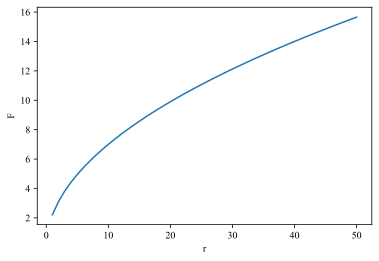

In [7]:
r=np.linspace(1,50)
f = np.sqrt(2)/2*np.sqrt(9.8*r)

plt.plot(r,f)
plt.xlabel("r")
plt.ylabel("F")
plt.show()

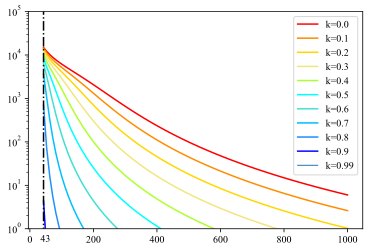

In [8]:
# 根据一组数据
E0 = 2e6 # 总无氧呼吸供能
k = np.linspace(0,0.9,10)
# print(k)
def T_new(P,k):
    return W_max / ( (4.37541170e-07*( (P-sigma1)/(1-k)**2 )**3+3.74765505) *( (P-sigma1)/(1-k)**2+sigma1) )

p_new = np.linspace(43,1000,100)
plt.figure(4)
plt.axes(yscale = "log") # 在plot语句前加上该句话即可
yy=[]
color=["#ff0000","#ff8c00","#ffd700","#f0e680","#adff2f","#00ffff","#40e0d0","#00bfff","#1e90ff","#0000ff","#191970"]
for i in range(len(k)):
    t_new = T_new(p_new,k[i])
    yy.append(t_new)
    plt.plot(p_new,t_new,color=color[i],label="k="+str(format(k[i], '.1f')))

t_new = T_new(p_new,0.98)
yy.append(t_new)
plt.plot(p_new,t_new,label="k="+str(0.99),lw="1")

plt.plot([43,43],[0,10e5],"k-.")
plt.text(43-10,1-0.5,"43")
plt.ylim(10e-1,10e4)
plt.legend()
# 线之间填充颜色
# for i in range(1):
#     plt.fill_between(p_new,yy[i],yy[i+1],where= yy[i+1]<yy[i],color=color[i])
plt.show()
